# Here we invesitgate the cuisines and the culture of specific regions in NYC to understand the kind of environment where the restaurant would be setup, the adaptations necessary to blend in with the chosen area for setup and to choose a suitable cuisine based on the dominance of the said set of cuisines.

In [9]:
import numpy as np 
import pandas as pd 
from PIL import Image 

%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

#!conda install -c conda-forge wordcloud==1.4.1 --yes
from wordcloud import STOPWORDS, WordCloud

print ('Wordcloud is installed and imported!')

Matplotlib version:  3.0.3
^C

CondaError: KeyboardInterrupt

Wordcloud is installed and imported!


In [11]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

import csv # implements classes to read and write tabular data in CSV form

print('Libraries imported.')

Libraries imported.


In [12]:
import matplotlib.pyplot as plt
# conda install -c anaconda beautiful-soup --yes
from bs4 import BeautifulSoup # package for parsing HTML and XML documents
print('Libraries imported.')

Libraries imported.


In [13]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

import csv #

In [16]:
import pandas as pd


In [17]:
cuisine_data = pd.read_csv('test.csv', "  ")

/home/jupyterlab/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [18]:
cuisine_data

,Borough,Neighbourhood,Cuisine
0,The Bronx,Bedford Park,"Mexican, Puerto Rican, Dominican, Korean"
1,The Bronx,Belmont,"Italian, Albanian"
2,The Bronx,City Island,"Italian, Seafood"
3,The Bronx,Morris Park,"Italian, Albanian"
4,The Bronx,Norwood,Filipino
5,The Bronx,Riverdale,Jewish
6,The Bronx,South Bronx,"Puerto Rican, Dominican"
7,The Bronx,Wakefield,"Jamaican, West Indian"
8,The Bronx,Woodlawn,Irish
9,Queens,Astoria Greek,"Italian, Eastern European, Brazilian, Egyptian..."


In [20]:
cuisine_data['Borough'].value_counts()

Brooklyn         19
Queens           13
Manhattan        12
The Bronx         9
Staten Island     3
Name: Borough, dtype: int64

In [22]:
diff_cuisine = cuisine_data['Cuisine'].value_counts()

In [24]:
diff_cuisine.to_frame()

,Cuisine
Italian,4
"Italian, Albanian",2
"Jewish, Russian, Uzbek",1
"Puerto Rican, Jewish, Italian, Latin American",1
"Puerto Rican, Mexican, Dominican, Chinese-Cuban, Italian",1
"Bengali, Pakistani, Mexican, Uzbek, Polish",1
"Jewish, Italian, Russian, Pakistani",1
"Italian, Russian, Arab, Polish",1
"Jamaican, West Indian",1
"Jamaican, West Indian, African-American",1


In [27]:
cuisine_data['Cuisine'].to_csv('diff_cuisine.txt', sep=',')
diff_cuisine = open('diff_cuisine.txt', 'r').read()



/home/jupyterlab/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


## NYC

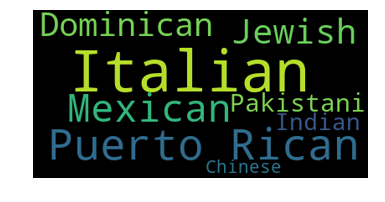

<Figure size 3600x3600 with 0 Axes>

In [46]:
cloud = WordCloud(
    background_color='black',
    max_words=8,
)
cloud.generate(diff_cuisine)
plt.imshow(cloud, interpolation='spline16')
plt.axis('off')
fig = plt.figure()

fig.set_figwidth(50)
fig.set_figheight(50)

plt.show()

### In NYC the dominant cuisines are the ones mentioned above. The safe bet would be to go with the ones mentioned. But we need to keep in mind that this might not be the case for the region where we finally decide to setup our restaurant. So we might need to further dive into cuisines specific to the boroughs.

### Another option to represent the data would be using the bubble plots or using cluster maps

In [64]:
Bronx = cuisine_data[cuisine_data['Borough'] == 'The Bronx'].reset_index(drop=True)
Bronx = Bronx['Cuisine']
Bronx.to_csv('bronx.txt', sep=',')
Bronx = open('bronx.txt', 'r').read()

Queens = cuisine_data[cuisine_data['Borough'] == 'Queens'].reset_index(drop=True)
Queens = Queens['Cuisine']
Queens.to_csv('queens.txt', sep=',')
Queens = open('queens.txt', 'r').read()

Brooklyn = cuisine_data[cuisine_data['Borough'] == 'Brooklyn'].reset_index(drop=True)
Brooklyn = Brooklyn['Cuisine']
Brooklyn.to_csv('brooklyn.txt', sep=',')
Brooklyn = open('brooklyn.txt', 'r').read()

State_island = cuisine_data[cuisine_data['Borough'] == 'Staten Island'].reset_index(drop=True)
State_island = State_island['Cuisine']
State_island.to_csv('island.txt', sep=',')
State_island = open('island.txt', 'r').read()

Manhattan = cuisine_data[cuisine_data['Borough'] == 'Manhattan'].reset_index(drop=True)
Manhattan = Manhattan['Cuisine']
Manhattan.to_csv('manhattan.txt', sep=',')
Manhattan = open('manhattan.txt', 'r').read()

/home/jupyterlab/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/jupyterlab/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  
/home/jupyterlab/conda/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  del sys.path[0]
/home/jupyt

## The_Bronx

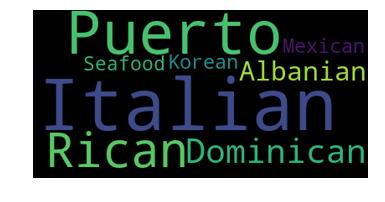

<Figure size 3600x3600 with 0 Axes>

In [54]:
cloud1 = WordCloud(
    background_color='black',
    max_words=8,
)
cloud1.generate(Bronx)
plt.imshow(cloud1, interpolation='spline16')
plt.axis('off')
fig = plt.figure()

fig.set_figwidth(50)
fig.set_figheight(50)

plt.show()

## Brooklyn

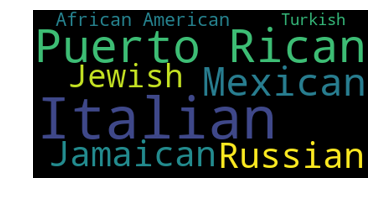

<Figure size 3600x3600 with 0 Axes>

In [60]:
cloud2 = WordCloud(
    background_color='black',
    max_words=8,
)
cloud2.generate(Brooklyn)
plt.imshow(cloud2, interpolation='spline16')
plt.axis('off')
fig = plt.figure()

fig.set_figwidth(50)
fig.set_figheight(50)

plt.show()

## Queens

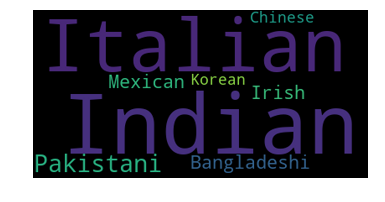

<Figure size 3600x3600 with 0 Axes>

In [61]:
cloud3 = WordCloud(
    background_color='black',
    max_words=8,
)
cloud3.generate(Queens)
plt.imshow(cloud3, interpolation='spline16')
plt.axis('off')
fig = plt.figure()

fig.set_figwidth(50)
fig.set_figheight(50)

plt.show()

## Staten_island

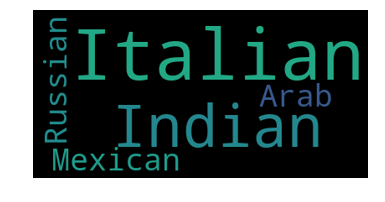

<Figure size 3600x3600 with 0 Axes>

In [65]:
cloud4 = WordCloud(
    background_color='black',
    max_words=5,
)
cloud4.generate(State_island)
plt.imshow(cloud4, interpolation='spline16')
plt.axis('off')
fig = plt.figure()

fig.set_figwidth(50)
fig.set_figheight(50)

plt.show()

## Manhattan

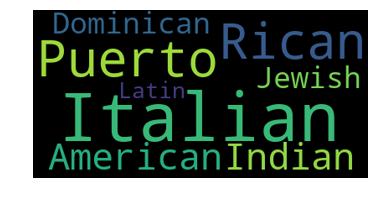

<Figure size 3600x3600 with 0 Axes>

In [66]:
cloud5 = WordCloud(
    background_color='black',
    max_words=8,
)
cloud5.generate(Manhattan)
plt.imshow(cloud5, interpolation='spline16')
plt.axis('off')
fig = plt.figure()

fig.set_figwidth(50)
fig.set_figheight(50)

plt.show()

# Similarly let us now look at the culture of these regions and try and make our restaurant have a very prominant and accepted region based theme.

## Bronx Culture

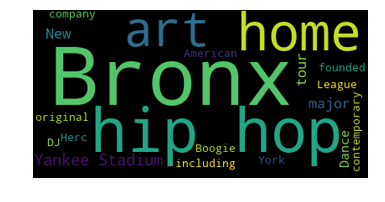

<Figure size 3600x3600 with 0 Axes>

In [80]:
Bronx_culture = open('bx.txt', 'r').read()
cloudc1 = WordCloud(
    background_color='black',
    max_words=20,
)
cloudc1.generate(Bronx_culture)
plt.imshow(cloudc1, interpolation='spline16')
plt.axis('off')
fig = plt.figure()

fig.set_figwidth(50)
fig.set_figheight(50)

plt.show()

## Brooklyn Culture

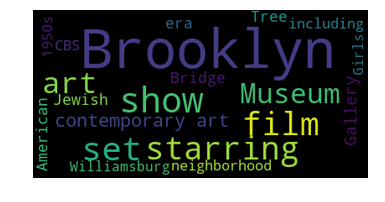

<Figure size 3600x3600 with 0 Axes>

In [79]:
Brooklyn_culture = open('bln.txt', 'r').read()
cloudc2 = WordCloud(
    background_color='black',
    max_words=20,
)
cloudc2.generate(Brooklyn_culture)
plt.imshow(cloudc2, interpolation='spline16')
plt.axis('off')
fig = plt.figure()

fig.set_figwidth(50)
fig.set_figheight(50)

plt.show()

## Queens Culture

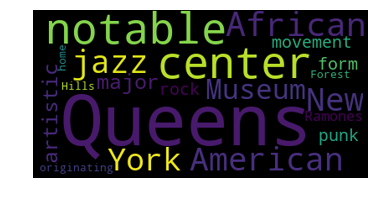

<Figure size 3600x3600 with 0 Axes>

In [78]:
Queens_culture = open('Qns.txt', 'r').read()
cloudc3 = WordCloud(
    background_color='black',
    max_words=20,
)
cloudc3.generate(Queens_culture)
plt.imshow(cloudc3, interpolation='spline16')
plt.axis('off')
fig = plt.figure()

fig.set_figwidth(50)
fig.set_figheight(50)

plt.show()

## Staten_Island Culture

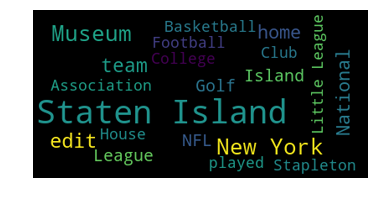

<Figure size 3600x3600 with 0 Axes>

In [76]:
Staten_culture = open('stn.txt', 'r').read()
cloudc4 = WordCloud(
    background_color='black',
    max_words=20,
)
cloudc4.generate(Staten_culture)
plt.imshow(cloudc4, interpolation='spline16')
plt.axis('off')
fig = plt.figure()

fig.set_figwidth(50)
fig.set_figheight(50)

plt.show()

## Manhattan Culture

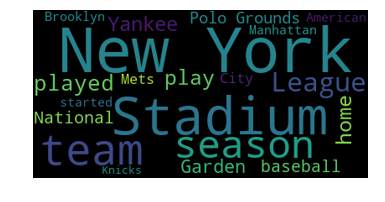

<Figure size 3600x3600 with 0 Axes>

In [77]:
Manhattan_culture = open('man.txt', 'r').read()
cloudc5 = WordCloud(
    background_color='black',
    max_words=20,
)
cloudc5.generate(Manhattan_culture)
plt.imshow(cloudc5, interpolation='spline16')
plt.axis('off')
fig = plt.figure()

fig.set_figwidth(50)
fig.set_figheight(50)

plt.show()